In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logomaker as lm
import pandas as pd

## Specify inputs and load data

In [2]:
input_layer_weights = np.loadtxt("weights.csv")
x = 5 # specify node

In [3]:
# Output layer -> node x between 1 and 9
node = []
for nt in input_layer_weights:
    node.append(nt[x-1])
node = np.array(node)

## Make logo
* Reshape dimensions: 42 rows, 4 columns
* Normalize
    * _cannot_ do this by adding the absolute value of the most negative number and dividing by the sum
    * use exp(j) / sum(row)exp(j)
* Logo

[-0.0360182   0.02852098 -0.02069508  0.05277254]
4.027261760076838
[0.23952322810304236, 0.25549161241015506, 0.24322173523781748, 0.26176342424898497]
[ 0.14762588  0.09679432 -0.04286373  0.07001211]
4.291276044263888
[0.2701012865586821, 0.2567147276038877, 0.22325339215293305, 0.24993059368449724]
[-0.10933238 -0.1548756  -0.20903365  0.10232288]
3.672063148014813
[0.2441222755809663, 0.23325353830630222, 0.2209569661381636, 0.3016672199745679]
[-0.05789389 -0.03826005 -0.14796121 -0.14888689]
3.6303438413227975
[0.2599616247648505, 0.2651161041924248, 0.23757104202547893, 0.2373512290172457]
[ 0.01969756 -0.08198705 -0.18085462  0.08729054]
3.866947076807302
[0.26374626150558433, 0.23824579725205622, 0.21581797246000714, 0.2821899687823524]
[ 0.05377321 -0.11213122  0.13317089 -0.164033  ]
3.9403314393634425
[0.2678062176617449, 0.2268659289305387, 0.28993632431524785, 0.21539152909246861]
[ 0.00963942 -0.03701263  0.117599   -0.1809156 ]
3.9326487530648575
[0.2567445221299561, 0

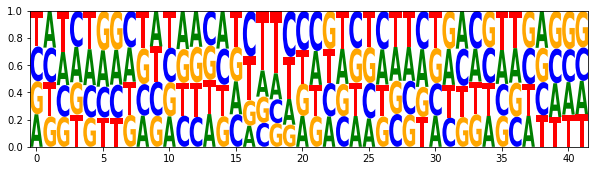

In [4]:
node = node.reshape(42, 4)
node_norm = []
for nt in node:
    print(nt)
    norm_ntlst = []
    row_sum = sum([np.exp(j) for j in nt])
    print(row_sum)
    for j in nt:
        norm_j = np.exp(j) / row_sum
        norm_ntlst.append(norm_j)
    print(norm_ntlst)
    node_norm.append(norm_ntlst)
df = pd.DataFrame(node_norm, columns=['A','C','G','T'])
logo = lm.Logo(df)

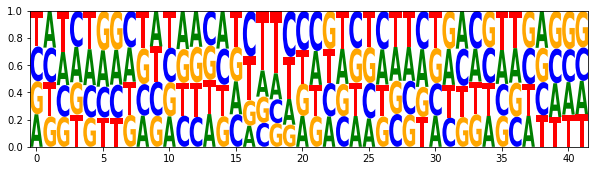

In [5]:
logo = lm.Logo(df)

* Find sequence that maximizes: pick out max out of every row

In [13]:
dct = {0:'A', 1:'C', 2:'G', 3:'T'}
seq = ""
for row in np.exp(node):
    idx = np.argmax(row) # find where the maximum of the row is
    seq += dct[idx]
seq

'TATCTGGCTATAACATCTTCCCGTCTCTTCTGACGTTGAGGG'

## View raw output

In [7]:
# zoom in to center
node1[56:-56].shape

NameError: name 'node1' is not defined

In [ ]:
plt.bar(list(range(0,56)), node1[56:-56])

In [ ]:
node2 = []
for nt in input_layer_weights:
    node2.append(nt[1])
node2 = np.array(node2)
plt.bar(list(range(0,56)), node2[56:-56])

In [ ]:
node3 = []
for nt in input_layer_weights:
    node3.append(nt[2])
node3 = np.array(node3)
plt.bar(list(range(0,168)), node3)

In [ ]:
print(node1.shape)

In [ ]:
'''
Code for stacked bar chart
labels = [i for i in range(0,42)]
#pctA = node1[0,:]
#pctC = node1[1,:]
#pctG = node1[2,:]
#pctT = node1[3,:]
pctA = node1[:,0]
pctC = node1[:,1]
pctG = node1[:,2]
pctT = node1[:,3]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, pctA, width, label='A')
ax.bar(labels, pctC, width, label='C', bottom=pctA)
ax.bar(labels, pctG, width, label='G', bottom=pctA+pctG)
ax.bar(labels, pctT, width, label='T', bottom=pctA+pctG+pctT)

ax.set_ylabel('Proportion')
ax.set_title('Title')
ax.legend()

plt.show()
'''